<a href="https://colab.research.google.com/github/someshsingh22/TeamEleven/blob/main/BaselinesNonFlippedFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import json
import numpy as np
import pandas as pd
import sklearn
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LassoCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
matches_df = pd.read_csv("matches.csv")

In [ ]:
matches_df.head()

,Date,Team_1,Team_2,Venue,MatchCode,GroundCode
0,2015-03-04,AFG,AUS,Away,3773,65
1,2012-08-25,AFG,AUS,Neutral,3437,156
2,2019-06-01,AFG,AUS,Neutral,4306,149
3,2014-03-01,AFG,BAN,Away,3623,190
4,2016-09-25,AFG,BAN,Away,3936,198


In [ ]:
len(matches_df)

3656

## Data Preprocessing

In [ ]:
matches_df["Team_1"].value_counts()

AUS    876
IND    631
ENG    509
PAK    396
NZL    340
BAN    317
SAF    160
SRL    106
AFG    102
KEN     77
IRE     71
WIN     42
NED     23
SCO      6
Name: Team_1, dtype: int64

In [ ]:
matches_df["Team_2"].value_counts()

WIN    680
SRL    648
ZIM    480
PAK    454
SAF    398
NZL    352
IND    254
ENG    167
SCO     62
IRE     50
KEN     46
NED     33
BAN     29
AUS      3
Name: Team_2, dtype: int64

In [ ]:
f = open('scorecard.json',) 
data = json.load(f)

In [ ]:
df = pd.DataFrame(data)

In [ ]:
df = df.transpose()

In [ ]:
df.head()

,ORDER,TOSS,BATTING1,BOWLING1,BATTING2,BOWLING2,SCORES
3773,"[Australia, Afghanistan]",Afghanistan,"[[3637, c Mohammad Nabi b Shapoor Zadran, 17...","[[3875, 10.0, 1.0, 101.0, 2.0, 10.1, 0.2], [37...","[[3845, c Nawroz Mangal b Dawlat Zadran, 4.0...","[[3830, 6.0, 0.0, 18.0, 2.0, 3.0, 0.2], [3799,...","[417, 142]"
3437,"[Australia, Afghanistan]",Australia,"[[3910, c & b Mohammad Nabi, 75.0, 108.0, 2.0...","[[3729, 8.0, 0.0, 60.0, 2.0, 7.5, 0.2], [3875,...","[[3637, c †Mohammad Shahzad b Shapoor Zadran,...","[[3854, 9.0, 1.0, 46.0, 3.0, 5.11, 0.3], [3830...","[272, 206]"
4306,"[Afghanistan, Australia]",Afghanistan,"[[3728, b Starc, 0.0, 3.0, 0.0, 0.0, 0.0, 0],...","[[3830, 7.0, 1.0, 31.0, 1.0, 4.43, 0.1], [3909...","[[4615, c †Carey b Cummins, 0.0, 2.0, 0.0, 0....","[[4714, 4.5, 0.0, 45.0, 1.0, 9.31, 0.1], [3672...","[207, 209]"
3623,"[Afghanistan, Bangladesh]",Bangladesh,"[[3728, lbw b Rubel Hossain, 2.0, 8.0, 0.0, 0...","[[3635, 10.0, 0.0, 61.0, 1.0, 6.1, 0.1], [3180...","[[3664, c & b Arafat Sunny, 12.0, 36.0, 0.0, ...","[[3729, 8.0, 0.0, 39.0, 2.0, 4.88, 0.2], [3672...","[254, 222]"
3936,"[Bangladesh, Afghanistan]",Bangladesh,"[[3461, c Naveen -ul-Haq b Mirwais Ashraf, 8...","[[3875, 10.0, 0.0, 73.0, 4.0, 7.3, 0.4], [4590...","[[4362, c Shabir Noori b Dawlat Zadran, 0.0,...","[[2995, 10.0, 0.0, 42.0, 2.0, 4.2, 0.2], [4299...","[265, 258]"


In [ ]:
len(df)

3656

In [ ]:
df = df.drop(['BATTING1', 'BOWLING1','BATTING2', 'BOWLING2'], axis=1)

In [ ]:
df.head()

,ORDER,TOSS,SCORES
3773,"[Australia, Afghanistan]",Afghanistan,"[417, 142]"
3437,"[Australia, Afghanistan]",Australia,"[272, 206]"
4306,"[Afghanistan, Australia]",Afghanistan,"[207, 209]"
3623,"[Afghanistan, Bangladesh]",Bangladesh,"[254, 222]"
3936,"[Bangladesh, Afghanistan]",Bangladesh,"[265, 258]"


In [ ]:
df['MatchCode'] = df.index

In [ ]:
df.head()

,ORDER,TOSS,SCORES,MatchCode
3773,"[Australia, Afghanistan]",Afghanistan,"[417, 142]",3773
3437,"[Australia, Afghanistan]",Australia,"[272, 206]",3437
4306,"[Afghanistan, Australia]",Afghanistan,"[207, 209]",4306
3623,"[Afghanistan, Bangladesh]",Bangladesh,"[254, 222]",3623
3936,"[Bangladesh, Afghanistan]",Bangladesh,"[265, 258]",3936


In [ ]:
df = df.astype({"MatchCode": int})

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3656 entries, 3773 to 2528
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ORDER      3656 non-null   object
 1   TOSS       3656 non-null   object
 2   SCORES     3656 non-null   object
 3   MatchCode  3656 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 142.8+ KB


In [ ]:
match_df = matches_df.merge(df,on='MatchCode')

In [ ]:
name_to_code = {
    
    "Afghanistan" : "AFG",
    "Australia" : "AUS",
    "Bangladesh" : "BAN",
    "England" : "ENG",
    "India" : "IND",
    "Ireland" : "IRE",
    "Kenya" : "KEN",
    "Netherlands" : "NED",
    "New Zealand" : "NZL",
    "Pakistan" : "PAK",
    "South Africa" : "SAF",
    "Scotland" : "SCO",
    "Sri Lanka" : "SRL",
    "West Indies" : "WIN",
    "Zimbabwe" : "ZIM"

}

In [ ]:
match_df.replace({'TOSS':name_to_code}, inplace=True)
match_df.head()

,Date,Team_1,Team_2,Venue,MatchCode,GroundCode,ORDER,TOSS,SCORES
0,2015-03-04,AFG,AUS,Away,3773,65,"[Australia, Afghanistan]",AFG,"[417, 142]"
1,2012-08-25,AFG,AUS,Neutral,3437,156,"[Australia, Afghanistan]",AUS,"[272, 206]"
2,2019-06-01,AFG,AUS,Neutral,4306,149,"[Afghanistan, Australia]",AFG,"[207, 209]"
3,2014-03-01,AFG,BAN,Away,3623,190,"[Afghanistan, Bangladesh]",BAN,"[254, 222]"
4,2016-09-25,AFG,BAN,Away,3936,198,"[Bangladesh, Afghanistan]",BAN,"[265, 258]"


In [ ]:
match_df[['team1','team2']] = pd.DataFrame(match_df.ORDER.tolist(), index= match_df.index)
match_df.head()

,Date,Team_1,Team_2,Venue,MatchCode,GroundCode,ORDER,TOSS,SCORES,team1,team2
0,2015-03-04,AFG,AUS,Away,3773,65,"[Australia, Afghanistan]",AFG,"[417, 142]",Australia,Afghanistan
1,2012-08-25,AFG,AUS,Neutral,3437,156,"[Australia, Afghanistan]",AUS,"[272, 206]",Australia,Afghanistan
2,2019-06-01,AFG,AUS,Neutral,4306,149,"[Afghanistan, Australia]",AFG,"[207, 209]",Afghanistan,Australia
3,2014-03-01,AFG,BAN,Away,3623,190,"[Afghanistan, Bangladesh]",BAN,"[254, 222]",Afghanistan,Bangladesh
4,2016-09-25,AFG,BAN,Away,3936,198,"[Bangladesh, Afghanistan]",BAN,"[265, 258]",Bangladesh,Afghanistan


In [ ]:
match_df[['score1','score2']] = pd.DataFrame(match_df.SCORES.tolist(), index= match_df.index)
match_df.head()

,Date,Team_1,Team_2,Venue,MatchCode,GroundCode,ORDER,TOSS,SCORES,team1,team2,score1,score2
0,2015-03-04,AFG,AUS,Away,3773,65,"[Australia, Afghanistan]",AFG,"[417, 142]",Australia,Afghanistan,417,142
1,2012-08-25,AFG,AUS,Neutral,3437,156,"[Australia, Afghanistan]",AUS,"[272, 206]",Australia,Afghanistan,272,206
2,2019-06-01,AFG,AUS,Neutral,4306,149,"[Afghanistan, Australia]",AFG,"[207, 209]",Afghanistan,Australia,207,209
3,2014-03-01,AFG,BAN,Away,3623,190,"[Afghanistan, Bangladesh]",BAN,"[254, 222]",Afghanistan,Bangladesh,254,222
4,2016-09-25,AFG,BAN,Away,3936,198,"[Bangladesh, Afghanistan]",BAN,"[265, 258]",Bangladesh,Afghanistan,265,258


In [ ]:
match_df = match_df.drop(['ORDER', 'SCORES'], axis=1)
match_df.head()

,Date,Team_1,Team_2,Venue,MatchCode,GroundCode,TOSS,team1,team2,score1,score2
0,2015-03-04,AFG,AUS,Away,3773,65,AFG,Australia,Afghanistan,417,142
1,2012-08-25,AFG,AUS,Neutral,3437,156,AUS,Australia,Afghanistan,272,206
2,2019-06-01,AFG,AUS,Neutral,4306,149,AFG,Afghanistan,Australia,207,209
3,2014-03-01,AFG,BAN,Away,3623,190,BAN,Afghanistan,Bangladesh,254,222
4,2016-09-25,AFG,BAN,Away,3936,198,BAN,Bangladesh,Afghanistan,265,258


In [ ]:
match_df.replace({'team1':name_to_code,'team2':name_to_code}, inplace=True)
match_df.head()

,Date,Team_1,Team_2,Venue,MatchCode,GroundCode,TOSS,team1,team2,score1,score2
0,2015-03-04,AFG,AUS,Away,3773,65,AFG,AUS,AFG,417,142
1,2012-08-25,AFG,AUS,Neutral,3437,156,AUS,AUS,AFG,272,206
2,2019-06-01,AFG,AUS,Neutral,4306,149,AFG,AFG,AUS,207,209
3,2014-03-01,AFG,BAN,Away,3623,190,BAN,AFG,BAN,254,222
4,2016-09-25,AFG,BAN,Away,3936,198,BAN,BAN,AFG,265,258


In [ ]:
match_df['Score_1'] = match_df['score1']
match_df['Score_2'] = match_df['score2']
match_df.head()

,Date,Team_1,Team_2,Venue,MatchCode,GroundCode,TOSS,team1,team2,score1,score2,Score_1,Score_2
0,2015-03-04,AFG,AUS,Away,3773,65,AFG,AUS,AFG,417,142,417,142
1,2012-08-25,AFG,AUS,Neutral,3437,156,AUS,AUS,AFG,272,206,272,206
2,2019-06-01,AFG,AUS,Neutral,4306,149,AFG,AFG,AUS,207,209,207,209
3,2014-03-01,AFG,BAN,Away,3623,190,BAN,AFG,BAN,254,222,254,222
4,2016-09-25,AFG,BAN,Away,3936,198,BAN,BAN,AFG,265,258,265,258


In [ ]:
for ind in match_df.index: 
  if(match_df['Team_1'][ind]==match_df['team1'][ind]):
    match_df['Score_1'][ind] = match_df['score1'][ind]
    match_df['Score_2'][ind] = match_df['score2'][ind]
  else:
    match_df['Score_1'][ind] = match_df['score2'][ind]
    match_df['Score_2'][ind] = match_df['score1'][ind]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/py

In [ ]:
match_df.head()

,Date,Team_1,Team_2,Venue,MatchCode,GroundCode,TOSS,team1,team2,score1,score2,Score_1,Score_2
0,2015-03-04,AFG,AUS,Away,3773,65,AFG,AUS,AFG,417,142,142,417
1,2012-08-25,AFG,AUS,Neutral,3437,156,AUS,AUS,AFG,272,206,206,272
2,2019-06-01,AFG,AUS,Neutral,4306,149,AFG,AFG,AUS,207,209,207,209
3,2014-03-01,AFG,BAN,Away,3623,190,BAN,AFG,BAN,254,222,254,222
4,2016-09-25,AFG,BAN,Away,3936,198,BAN,BAN,AFG,265,258,258,265


In [ ]:
match_df = match_df.drop(['team1', 'team2','score1','score2'], axis=1)
match_df.head()

,Date,Team_1,Team_2,Venue,MatchCode,GroundCode,TOSS,Score_1,Score_2
0,2015-03-04,AFG,AUS,Away,3773,65,AFG,142,417
1,2012-08-25,AFG,AUS,Neutral,3437,156,AUS,206,272
2,2019-06-01,AFG,AUS,Neutral,4306,149,AFG,207,209
3,2014-03-01,AFG,BAN,Away,3623,190,BAN,254,222
4,2016-09-25,AFG,BAN,Away,3936,198,BAN,258,265


In [ ]:
venue_encoding = {
    
    "Home" : 0,
    "Away" : 1,
    "Neutral" : 2
}

In [ ]:
match_df.replace({'Venue':venue_encoding}, inplace=True)
match_df.head()

,Date,Team_1,Team_2,Venue,MatchCode,GroundCode,TOSS,Score_1,Score_2
0,2015-03-04,AFG,AUS,1,3773,65,AFG,142,417
1,2012-08-25,AFG,AUS,2,3437,156,AUS,206,272
2,2019-06-01,AFG,AUS,2,4306,149,AFG,207,209
3,2014-03-01,AFG,BAN,1,3623,190,BAN,254,222
4,2016-09-25,AFG,BAN,1,3936,198,BAN,258,265


In [ ]:
match_df['Winner'] = match_df['TOSS']

In [ ]:
for ind in match_df.index: 
  if(match_df['Score_1'][ind]>match_df['Score_2'][ind]):
    match_df['Winner'][ind] = match_df['Team_1'][ind]
  else:
    match_df['Winner'][ind] = match_df['Team_2'][ind]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
for ind in match_df.index: 
  if(match_df['TOSS'][ind]==match_df['Team_1'][ind]):
    match_df['TOSS'][ind] = 1
  else:
    match_df['TOSS'][ind] = 2

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
match_df.head()

,Date,Team_1,Team_2,Venue,MatchCode,GroundCode,TOSS,Score_1,Score_2,Winner
0,2015-03-04,AFG,AUS,1,3773,65,1,142,417,AUS
1,2012-08-25,AFG,AUS,2,3437,156,2,206,272,AUS
2,2019-06-01,AFG,AUS,2,4306,149,1,207,209,AUS
3,2014-03-01,AFG,BAN,1,3623,190,2,254,222,AFG
4,2016-09-25,AFG,BAN,1,3936,198,2,258,265,BAN


In [16]:
!pip install --upgrade tables

Requirement already up-to-date: tables in /usr/local/lib/python3.6/dist-packages (3.6.1)


In [ ]:
# Save the final dataframe
data_store = pd.HDFStore('processed_data.h5')

data_store['preprocessed_df'] = match_df
data_store.close()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed-integer,key->block1_values] [items->Index(['Date', 'Team_1', 'Team_2', 'TOSS', 'Winner'], dtype='object')]

  exec(code_obj, self.user_global_ns, self.user_ns)


##Data Analysis

In [2]:
# Access data store
data_store = pd.HDFStore('processed_data.h5')

# Retrieve data using key
match_df = data_store['preprocessed_df']
data_store.close()

In [3]:
np.random.seed(42)

In [4]:
match_df.head()

,Date,Team_1,Team_2,Venue,MatchCode,GroundCode,TOSS,Score_1,Score_2,Winner
0,2015-03-04,AFG,AUS,1,3773,65,1,142,417,AUS
1,2012-08-25,AFG,AUS,2,3437,156,2,206,272,AUS
2,2019-06-01,AFG,AUS,2,4306,149,1,207,209,AUS
3,2014-03-01,AFG,BAN,1,3623,190,2,254,222,AFG
4,2016-09-25,AFG,BAN,1,3936,198,2,258,265,BAN


In [5]:
ss = match_df['TOSS'] == match_df['Winner']
ss.groupby(ss).size()

False    3656
dtype: int64

From the above numbers, it does seem that there might be a slight correlation between winning the toss and winning the match

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


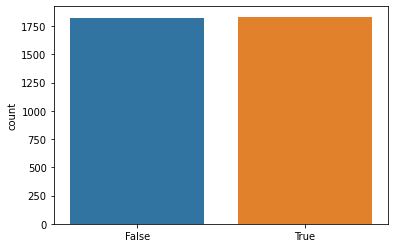

In [ ]:
sns.countplot(ss)

In [ ]:
df_group = match_df.groupby('GroundCode')

In [ ]:
df_group.head()

,Date,Team_1,Team_2,Venue,MatchCode,GroundCode,TOSS,Score_1,Score_2,Winner
0,2015-03-04,AFG,AUS,1,3773,65,1,142,417,AUS
1,2012-08-25,AFG,AUS,2,3437,156,2,206,272,AUS
2,2019-06-01,AFG,AUS,2,4306,149,1,207,209,AUS
3,2014-03-01,AFG,BAN,1,3623,190,2,254,222,AFG
4,2016-09-25,AFG,BAN,1,3936,198,2,258,265,BAN
...,...,...,...,...,...,...,...,...,...,...
3596,1993-11-15,SRL,ZIM,2,911,134,2,263,208,SRL
3601,1999-05-22,SRL,ZIM,2,1539,143,1,198,197,SRL
3642,1983-06-13,WIN,ZIM,2,262,143,1,218,217,WIN
3648,2000-07-11,WIN,ZIM,2,1703,160,1,186,256,ZIM


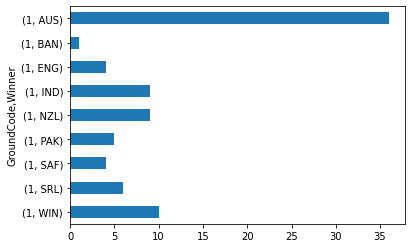

In [ ]:
df_group['Winner'].value_counts()[:9].sort_index(ascending=False).plot(kind='barh')

According to the analysis, there seems to be clear correlation between Australia playing a game in ground 1 and Australia winning. It also seems that Bangladesh is unable to perform well when playing in Ground 1. Let's use Causal Inference techniques to confirm that the ground influences the winning team.

In [ ]:
!pip install pyif
!pip install nose

In [ ]:
labelencoder = LabelEncoder()

In [ ]:
match_df['Winner_Enc'] = labelencoder.fit_transform(match_df['Winner'])
match_df.head()

,Date,Team_1,Team_2,Venue,MatchCode,GroundCode,TOSS,Score_1,Score_2,Winner,Winner_Enc
0,2015-03-04,AFG,AUS,1,3773,65,1,142,417,AUS,1
1,2012-08-25,AFG,AUS,2,3437,156,2,206,272,AUS,1
2,2019-06-01,AFG,AUS,2,4306,149,1,207,209,AUS,1
3,2014-03-01,AFG,BAN,1,3623,190,2,254,222,AFG,0
4,2016-09-25,AFG,BAN,1,3936,198,2,258,265,BAN,2


In [ ]:
match_df['Ground_Enc'] = labelencoder.fit_transform(match_df['GroundCode'])
match_df.head()

,Date,Team_1,Team_2,Venue,MatchCode,GroundCode,TOSS,Score_1,Score_2,Winner,Winner_Enc,Ground_Enc
0,2015-03-04,AFG,AUS,1,3773,65,1,142,417,AUS,1,53
1,2012-08-25,AFG,AUS,2,3437,156,2,206,272,AUS,1,119
2,2019-06-01,AFG,AUS,2,4306,149,1,207,209,AUS,1,112
3,2014-03-01,AFG,BAN,1,3623,190,2,254,222,AFG,0,152
4,2016-09-25,AFG,BAN,1,3936,198,2,258,265,BAN,2,160


In [ ]:
from PyIF import te_compute as te
rand = np.random.RandomState(seed=23)

TE = te.te_compute(np.array(match_df['Ground_Enc']), np.array(match_df['Winner_Enc']), k=1, embedding=1, safetyCheck=False, GPU=False)

print(TE)

0.33937395732974984


The transfer entropy value indicates a small positive causal relationship of the ground on the winning team

In [ ]:
match_df = match_df.drop(['Ground_Enc', 'Winner_Enc'], axis=1)
match_df.head()

,Date,Team_1,Team_2,Venue,MatchCode,GroundCode,TOSS,Score_1,Score_2,Winner
0,2015-03-04,AFG,AUS,1,3773,65,1,142,417,AUS
1,2012-08-25,AFG,AUS,2,3437,156,2,206,272,AUS
2,2019-06-01,AFG,AUS,2,4306,149,1,207,209,AUS
3,2014-03-01,AFG,BAN,1,3623,190,2,254,222,AFG
4,2016-09-25,AFG,BAN,1,3936,198,2,258,265,BAN


In [5]:
match_df['Winner_team'] = match_df['Winner']
match_df.head()

,Date,Team_1,Team_2,Venue,MatchCode,GroundCode,TOSS,Score_1,Score_2,Winner,Winner_team
0,2015-03-04,AFG,AUS,1,3773,65,1,142,417,AUS,AUS
1,2012-08-25,AFG,AUS,2,3437,156,2,206,272,AUS,AUS
2,2019-06-01,AFG,AUS,2,4306,149,1,207,209,AUS,AUS
3,2014-03-01,AFG,BAN,1,3623,190,2,254,222,AFG,AFG
4,2016-09-25,AFG,BAN,1,3936,198,2,258,265,BAN,BAN


In [6]:
for ind in match_df.index: 
  if(match_df['Winner'][ind]==match_df['Team_1'][ind]):
    match_df['Winner_team'][ind] = 1
  else:
    match_df['Winner_team'][ind] = 2

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [7]:
match_df.head()

,Date,Team_1,Team_2,Venue,MatchCode,GroundCode,TOSS,Score_1,Score_2,Winner,Winner_team
0,2015-03-04,AFG,AUS,1,3773,65,1,142,417,AUS,2
1,2012-08-25,AFG,AUS,2,3437,156,2,206,272,AUS,2
2,2019-06-01,AFG,AUS,2,4306,149,1,207,209,AUS,2
3,2014-03-01,AFG,BAN,1,3623,190,2,254,222,AFG,1
4,2016-09-25,AFG,BAN,1,3936,198,2,258,265,BAN,2


In [ ]:
sum(match_df['Venue']==match_df['Winner_team'])

1053

The winning team was playing on the home turf approximately 30% of the time

#Models

In [8]:
enc = OneHotEncoder(handle_unknown='ignore')

In [9]:
enc_df = pd.DataFrame(enc.fit_transform(match_df[['Winner_team','TOSS']]).toarray())

In [10]:
match_df = match_df.join(enc_df)
match_df.head()

,Date,Team_1,Team_2,Venue,MatchCode,GroundCode,TOSS,Score_1,Score_2,Winner,Winner_team,0,1,2,3
0,2015-03-04,AFG,AUS,1,3773,65,1,142,417,AUS,2,0.0,1.0,1.0,0.0
1,2012-08-25,AFG,AUS,2,3437,156,2,206,272,AUS,2,0.0,1.0,0.0,1.0
2,2019-06-01,AFG,AUS,2,4306,149,1,207,209,AUS,2,0.0,1.0,1.0,0.0
3,2014-03-01,AFG,BAN,1,3623,190,2,254,222,AFG,1,1.0,0.0,0.0,1.0
4,2016-09-25,AFG,BAN,1,3936,198,2,258,265,BAN,2,0.0,1.0,0.0,1.0


In [11]:
match_df.rename(columns = {0: 'Win1',1: 'Win2',2: 'Toss1',3: 'Toss2'}, inplace = True)

In [12]:
labelencoder = LabelEncoder()

match_df['Team_1Enc'] = labelencoder.fit_transform(match_df['Team_1'])
match_df['Team_2Enc'] = labelencoder.fit_transform(match_df['Team_2'])

In [13]:
match_df.head()

,Date,Team_1,Team_2,Venue,MatchCode,GroundCode,TOSS,Score_1,Score_2,Winner,Winner_team,Win1,Win2,Toss1,Toss2,Team_1Enc,Team_2Enc
0,2015-03-04,AFG,AUS,1,3773,65,1,142,417,AUS,2,0.0,1.0,1.0,0.0,0,0
1,2012-08-25,AFG,AUS,2,3437,156,2,206,272,AUS,2,0.0,1.0,0.0,1.0,0,0
2,2019-06-01,AFG,AUS,2,4306,149,1,207,209,AUS,2,0.0,1.0,1.0,0.0,0,0
3,2014-03-01,AFG,BAN,1,3623,190,2,254,222,AFG,1,1.0,0.0,0.0,1.0,0,1
4,2016-09-25,AFG,BAN,1,3936,198,2,258,265,BAN,2,0.0,1.0,0.0,1.0,0,1


In [14]:
X = match_df[['Date','Team_1Enc','Team_2Enc','Venue','GroundCode','TOSS','Toss1','Toss2']].copy()
y = match_df[['Winner_team','Win1','Win2','Score_1','Score_2']]

In [15]:
# Test Train Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/5, random_state = 100)

In [16]:
X_train.head()

,Date,Team_1Enc,Team_2Enc,Venue,GroundCode,TOSS,Toss1,Toss2
2104,2000-03-27,4,9,2,156,1,1.0,0.0
2919,2001-01-07,8,13,0,18,2,0.0,1.0
1521,2016-09-01,3,8,0,27,2,0.0,1.0
1158,2018-01-25,2,11,0,198,1,1.0,0.0
3016,2013-11-08,9,9,2,192,2,0.0,1.0


In [17]:
y_train.head()

,Winner_team,Win1,Win2,Score_1,Score_2
2104,2,0.0,1.0,164,167
2919,2,0.0,1.0,273,274
1521,1,1.0,0.0,252,247
1158,2,0.0,1.0,82,83
3016,2,0.0,1.0,238,266


In [18]:
def print_model_scores(model, data, y, predictors, target):
    '''
    A generic function to generate the performance report of the
    model in question on the data passed to it
    Args:
        model: ML Model to be checked
        data: data on which the model needs to pe trained
        y: data containing the target variables
        predictors: independent feature variable
        target: target variable
    '''
    model.fit(data[predictors], y[target])
    predictions = model.predict(data[predictors])
    rms = sklearn.metrics.mean_squared_error(predictions,y[target])**0.5
    print('RMS : %s' % '{0:.2%}'.format(rms))
    r2 = sklearn.metrics.r2_score(predictions,y[target])
    print('R2 : %s' % '{0:.2%}'.format(r2))
    return np.asarray(predictions)

In [19]:
def winner_prediction(model, data, y, predictors,winner):
  '''
    A generic function to predict the winner for the model in question 
    
    Args:
        model: ML Model to be checked
        data: data on which the model needs to be trained
        y: data containing the target variables
        predictors: independent feature variable
        winner: winning team
  '''
  pred1 = print_model_scores(model, X_train, y_train,predictor_var, ['Score_1'])
  pred2 = print_model_scores(model, X_train, y_train,predictor_var, ['Score_2'])

  pred = pred1 - pred2

  for i in range(len(pred)):
    if ((pred[i])>0):
      pred[i] = 1
    else:
      pred[i] = 2

  print("Model Accuracy is: ")
  print(sum(1 for x,y in zip(pred,winner) if x == y) / len(winner))

##Model1 - Toss + GroundCode 

In [ ]:
winner = y_train['Winner_team']
predictor_var = ['Team_1Enc','Team_2Enc', 'GroundCode','TOSS']
model = RandomForestRegressor(n_estimators = 100, random_state = 0)
winner_prediction(model, X_train, y_train,predictor_var, winner)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if sys.path[0] == '':


RMS : 3925.65%
R2 : 2.46%


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if sys.path[0] == '':


RMS : 3845.39%
R2 : -4.99%
Model Accuracy is: 
0.7229822161422709


In [ ]:
winner = y_train['Winner_team']
predictor_var = ['Team_1Enc','Team_2Enc', 'GroundCode','TOSS']
model = LinearRegression()
winner_prediction(model, X_train, y_train,predictor_var, winner)

RMS : 6153.22%
R2 : -54873.42%
RMS : 5956.56%
R2 : -11447.72%
Model Accuracy is: 
0.5406976744186046


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  


In [ ]:
winner = y_train['Winner_team']
predictor_var = ['Team_1Enc','Team_2Enc', 'GroundCode','TOSS']
model = DecisionTreeRegressor()
winner_prediction(model, X_train, y_train,predictor_var, winner)

RMS : 3571.67%
R2 : 49.33%
RMS : 3498.22%
R2 : 48.04%
Model Accuracy is: 
0.8204514363885089


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  


In [ ]:
winner = y_train['Winner_team']
predictor_var = ['Team_1Enc','Team_2Enc', 'GroundCode','TOSS']
model = LassoCV()
winner_prediction(model, X_train, y_train,predictor_var, winner)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:1088: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RMS : 6156.80%
R2 : -189511.14%


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:1088: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RMS : 5956.57%
R2 : -11621.48%
Model Accuracy is: 
0.536593707250342


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  


##Model2 - Toss + GroundCode + Venue

In [ ]:
winner = y_train['Winner_team']
predictor_var = ['Team_1Enc','Team_2Enc', 'GroundCode','TOSS','Venue']
model = RandomForestRegressor(n_estimators = 100, random_state = 0)
winner_prediction(model, X_train, y_train,predictor_var, winner)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if sys.path[0] == '':


RMS : 3918.36%
R2 : 2.72%


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if sys.path[0] == '':


RMS : 3836.83%
R2 : -4.82%
Model Accuracy is: 
0.7161422708618331


In [ ]:
winner = y_train['Winner_team']
predictor_var = ['Team_1Enc','Team_2Enc', 'GroundCode','TOSS','Venue']
model = LinearRegression()
winner_prediction(model, X_train, y_train,predictor_var, winner)

RMS : 6126.01%
R2 : -9212.53%
RMS : 5956.41%
R2 : -11378.81%
Model Accuracy is: 
0.5557455540355677


In [ ]:
winner = y_train['Winner_team']
predictor_var = ['Team_1Enc','Team_2Enc', 'GroundCode','TOSS','Venue']
model = DecisionTreeRegressor()
winner_prediction(model, X_train, y_train,predictor_var, winner)

RMS : 3571.55%
R2 : 49.33%
RMS : 3497.95%
R2 : 48.05%
Model Accuracy is: 
0.8207934336525308


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  


In [ ]:
winner = y_train['Winner_team']
predictor_var = ['Team_1Enc','Team_2Enc', 'GroundCode','TOSS','Venue']
model = LassoCV()
winner_prediction(model, X_train, y_train,predictor_var, winner)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:1088: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:1088: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RMS : 6126.67%
R2 : -12326.06%
RMS : 5956.49%
R2 : -12080.13%
Model Accuracy is: 
0.5509575923392613


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  


##Training on NRR

In [4]:
!pip install --upgrade tables

     |████████████████████████████████| 4.3MB 5.6MB/s 
  Found existing installation: tables 3.4.4
    Uninstalling tables-3.4.4:
      Successfully uninstalled tables-3.4.4


In [2]:
# Access data store
data_store = pd.HDFStore('nnr_data.h5')

# Retrieve data using key
match_df = data_store['preprocessed_df']
data_store.close()

In [5]:
enc = OneHotEncoder(handle_unknown='ignore')

In [6]:
enc_df = pd.DataFrame(enc.fit_transform(match_df[['Winner_team','TOSS']]).toarray())

In [7]:
match_df = match_df.join(enc_df)
match_df.head()

,Date,Team_1,Team_2,Venue,MatchCode,GroundCode,TOSS,Score_1,Score_2,Winner,Winner_team,NRR_team1,NRR_team2,0,1,2,3
0,2015-03-04,AFG,AUS,1,3773,65,1,142,417,AUS,2,-5.5,5.5,0.0,1.0,1.0,0.0
1,2012-08-25,AFG,AUS,2,3437,156,2,206,272,AUS,2,-1.32,1.32,0.0,1.0,0.0,1.0
2,2019-06-01,AFG,AUS,2,4306,149,1,207,209,AUS,2,-0.04,0.04,0.0,1.0,1.0,0.0
3,2014-03-01,AFG,BAN,1,3623,190,2,254,222,AFG,1,0.64,-0.64,1.0,0.0,0.0,1.0
4,2016-09-25,AFG,BAN,1,3936,198,2,258,265,BAN,2,-0.14,0.14,0.0,1.0,0.0,1.0


In [8]:
match_df.rename(columns = {0: 'Win1',1: 'Win2',2: 'Toss1',3: 'Toss2'}, inplace = True)

In [9]:
labelencoder = LabelEncoder()

match_df['Team_1Enc'] = labelencoder.fit_transform(match_df['Team_1'])
match_df['Team_2Enc'] = labelencoder.fit_transform(match_df['Team_2'])

In [10]:
match_df.head()

,Date,Team_1,Team_2,Venue,MatchCode,GroundCode,TOSS,Score_1,Score_2,Winner,Winner_team,NRR_team1,NRR_team2,Win1,Win2,Toss1,Toss2,Team_1Enc,Team_2Enc
0,2015-03-04,AFG,AUS,1,3773,65,1,142,417,AUS,2,-5.5,5.5,0.0,1.0,1.0,0.0,0,0
1,2012-08-25,AFG,AUS,2,3437,156,2,206,272,AUS,2,-1.32,1.32,0.0,1.0,0.0,1.0,0,0
2,2019-06-01,AFG,AUS,2,4306,149,1,207,209,AUS,2,-0.04,0.04,0.0,1.0,1.0,0.0,0,0
3,2014-03-01,AFG,BAN,1,3623,190,2,254,222,AFG,1,0.64,-0.64,1.0,0.0,0.0,1.0,0,1
4,2016-09-25,AFG,BAN,1,3936,198,2,258,265,BAN,2,-0.14,0.14,0.0,1.0,0.0,1.0,0,1


In [11]:
X = match_df[['Date','Team_1Enc','Team_2Enc','Venue','GroundCode','TOSS','Toss1','Toss2']].copy()
y = match_df[['Winner_team','Win1','Win2','Score_1','Score_2','NRR_team1','NRR_team2']].copy()

In [12]:
# Test Train Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/5, random_state = 100)

In [13]:
X_train.head()

,Date,Team_1Enc,Team_2Enc,Venue,GroundCode,TOSS,Toss1,Toss2
2347,1983-06-15,4,12,2,59,2,0.0,1.0
1398,1996-02-22,3,6,2,76,1,1.0,0.0
2100,1996-04-19,4,9,2,156,2,0.0,1.0
2563,2002-12-08,6,13,1,26,1,1.0,0.0
1520,2016-08-30,3,8,0,60,1,1.0,0.0


In [14]:
y_train.head()

,Winner_team,Win1,Win2,Score_1,Score_2,NRR_team1,NRR_team2
2347,2,0.0,1.0,216,282,-0.807273,0.807273
1398,1,1.0,0.0,279,230,0.98,-0.98
2100,2,0.0,1.0,249,287,-0.721987,0.721987
2563,1,1.0,0.0,211,17,3.88,-3.88
1520,1,1.0,0.0,444,275,3.38,-3.38


In [15]:
def print_model_scores(model, data, y, predictors, target):
    '''
    A generic function to generate the performance report of the
    model in question on the data passed to it using cross-validation
    
    Args:
        model: ML Model to be checked
        data: data on which the model needs to pe trained
        predictors: independent feature variable
        target: target variable
    '''
    model.fit(data[predictors], y[target])
    predictions = model.predict(data[predictors])
    #scores = cross_val_score(model, data[predictors], y[target], scoring="neg_mean_squared_error", cv=5)
    #print('Cross-Validation Score :{}'.format(np.sqrt(-scores)))
    rms = sklearn.metrics.mean_squared_error(predictions,y[target])**0.5
    print('RMS : %s' % '{0:.2%}'.format(rms))
    #print(f"Average RMSE: {np.sqrt(-scores).mean()}")
    r2 = sklearn.metrics.r2_score(predictions,y[target])
    print('R2 : %s' % '{0:.2%}'.format(r2))
    return np.asarray(predictions)

In [16]:
def winner_prediction(model, data, y, predictors,winner):
    pred = print_model_scores(model, X_train, y_train,predictor_var, ['NRR_team1'])
    
    
    for i in range(len(pred)):
        if ((pred[i])>0):
            pred[i] = 1
        elif (pred[i]==0):
            pred[i] = 0
        else:
            pred[i] = 2

    print("Model Accuracy is: ")
    print(sum(1 for x,y in zip(pred,winner) if x == y) / len(winner))

##Model1 - Toss + GroundCode 

In [17]:
winner = y_train['Winner_team']
predictor_var = ['Team_1Enc','Team_2Enc', 'GroundCode','TOSS']
model = RandomForestRegressor(n_estimators = 100, random_state = 0)
winner_prediction(model, X_train, y_train,predictor_var, winner)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if sys.path[0] == '':


RMS : 276.60%
R2 : -110.91%
Model Accuracy is: 
0.7218225419664268


In [18]:
winner = y_train['Winner_team']
predictor_var = ['Team_1Enc','Team_2Enc', 'GroundCode','TOSS']
model = LinearRegression()
winner_prediction(model, X_train, y_train,predictor_var, winner)

RMS : 359.06%
R2 : -143269.75%
Model Accuracy is: 
0.45940390544707094


In [19]:
winner = y_train['Winner_team']
predictor_var = ['Team_1Enc','Team_2Enc', 'GroundCode','TOSS']
model = DecisionTreeRegressor()
winner_prediction(model, X_train, y_train,predictor_var, winner)

RMS : 264.50%
R2 : -18.47%
Model Accuracy is: 
0.7995889003083247


In [20]:
winner = y_train['Winner_team']
predictor_var = ['Team_1Enc','Team_2Enc', 'GroundCode','TOSS']
model = LassoCV()
winner_prediction(model, X_train, y_train,predictor_var, winner)

RMS : 359.19%
R2 : -2590619981315607502991580456862875648.00%
Model Accuracy is: 
0.45940390544707094


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:1088: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


##Model2 - Toss + GroundCode + Venue

In [21]:
winner = y_train['Winner_team']
predictor_var = ['Team_1Enc','Team_2Enc', 'GroundCode','TOSS','Venue']
model = RandomForestRegressor(n_estimators = 100, random_state = 0)
winner_prediction(model, X_train, y_train,predictor_var, winner)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if sys.path[0] == '':


RMS : 276.40%
R2 : -107.37%
Model Accuracy is: 
0.7221651250428229


In [22]:
winner = y_train['Winner_team']
predictor_var = ['Team_1Enc','Team_2Enc', 'GroundCode','TOSS','Venue']
model = LinearRegression()
winner_prediction(model, X_train, y_train,predictor_var, winner)

RMS : 358.85%
R2 : -53725.58%
Model Accuracy is: 
0.4844124700239808


In [23]:
winner = y_train['Winner_team']
predictor_var = ['Team_1Enc','Team_2Enc', 'GroundCode','TOSS','Venue']
model = DecisionTreeRegressor()
winner_prediction(model, X_train, y_train,predictor_var, winner)

RMS : 264.50%
R2 : -18.47%
Model Accuracy is: 
0.7995889003083247


In [24]:
winner = y_train['Winner_team']
predictor_var = ['Team_1Enc','Team_2Enc', 'GroundCode','TOSS','Venue']
model = LassoCV()
winner_prediction(model, X_train, y_train,predictor_var, winner)

RMS : 359.19%
R2 : -2590619981315607502991580456862875648.00%
Model Accuracy is: 
0.45940390544707094


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:1088: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
